In [7]:
from shared.preface import *
import shared.functions as fct

PRE = PRE(
    sim='L025N752', 
    z0_snap=36, z4_snap=13, DM_lim=1000,
    sim_dir=SIM_ROOT, sim_ver=SIM_TYPE,
    phis=20, thetas=20, vels=200,
    pre_CPUs=10, sim_CPUs=128
)


# Make temporary folder to store files, s.t. parallel runs don't clash.
rand_code = ''.join(
    random.choices(string.ascii_uppercase + string.digits, k=4)
)
TEMP_DIR = f'{PRE.OUT_DIR}/temp_data_{rand_code}'
os.makedirs(TEMP_DIR)

Testing=False
if Testing:
    mass_gauge = 12.3
    mass_range = 0.3
    size = 1
else:
    mass_gauge = 12.0
    mass_range = 0.6
    size = 10

hname = f'1e+{mass_gauge}_pm{mass_range}Msun'
fct.halo_batch_indices(
    PRE.Z0_STR, mass_gauge, mass_range, 'halos', size, 
    hname, PRE.SIM_DIR, TEMP_DIR
)
halo_batch_IDs = np.load(f'{TEMP_DIR}/halo_batch_{hname}_indices.npy')
halo_batch_params = np.load(f'{TEMP_DIR}/halo_batch_{hname}_params.npy')
halo_num = len(halo_batch_params)

print('********Number density band********')
print('Halo batch params (Rvir,Mvir,cNFW):')
print(halo_batch_params)
print('***********************************')


for halo_j, halo_ID in enumerate(halo_batch_IDs[2:3]):

    # Generate progenitor index array for current halo.
    splits = re.split('/', SIM_TYPE)
    MTname = f'{PRE.SIM}_{splits[0]}_{splits[1]}'
    proj_IDs = fct.read_MergerTree(PRE.OUT_DIR, MTname, halo_ID)


    # for j, (snap, proj_ID) in enumerate(zip(
    #     PRE.NUMS_SNAPS[::-1], proj_IDs
    # )):

    # For snapshot 0036 at z=0.
    snap, proj_ID = PRE.NUMS_SNAPS[-1], proj_IDs[0]
    proj_ID = int(proj_ID)

    print(f'halo {halo_j+1}/{halo_num} ; snapshot {snap}')
    

    # --------------------------- #
    # Read and load DM positions. #
    # --------------------------- #

    # Define how many shells are used, out of len(DM_SHELL_EDGES)-1.
    shells = 1
    DM_shell_edges = DM_SHELL_EDGES[:shells+1]

    IDname = f'origID{halo_ID}_snap_{snap}'
    fct.read_DM_all_inRange(
        snap, proj_ID, DM_shell_edges, IDname, PRE.SIM_DIR, TEMP_DIR
    )

    DM_raw = np.load(f'{TEMP_DIR}/DM_pos_{IDname}_shell{int(shells-1)}.npy')


# Remove temporary folder with all individual neutrino files.
shutil.rmtree(TEMP_DIR)

********************* Initialization *********************
# Initial conditions for neutrinos:
PHIs = 20, THETAs=20, Vs=200
Total neutrinos: 80000
# Simulation parameters:
Simulation box: L025N752
Snapshot from 0036 (z=0) to 0013 (z=4)
Pre/Sim CPUs 10/128
DM limit for cells: 1000
# File management:
Box files directory: 
 /projects/0/einf180/Tango_sims/L025N752/DMONLY/SigmaConstant00
Output directory: 
 /gpfs/home4/zimmer/neutrino_clustering_V2/L025N752/DMONLY/SigmaConstant00
**********************************************************
********Number density band********
Halo batch params (Rvir,Mvir,cNFW):
[[253.5523526   12.24058042   6.9286026 ]
 [158.62979351  11.62953177   8.03988676]
 [137.07912107  11.43929142   9.41292697]
 [141.82849159  11.48366794   2.6088865 ]
 [306.35586267  12.48705608  11.48652354]
 [190.92998087  11.87099988   7.03921462]
 [240.52254202  12.17184485   7.39127504]
 [169.32112452  11.71451092   8.23421103]
 [167.71139596  11.70206521   7.62954256]
 [168.53268

330004


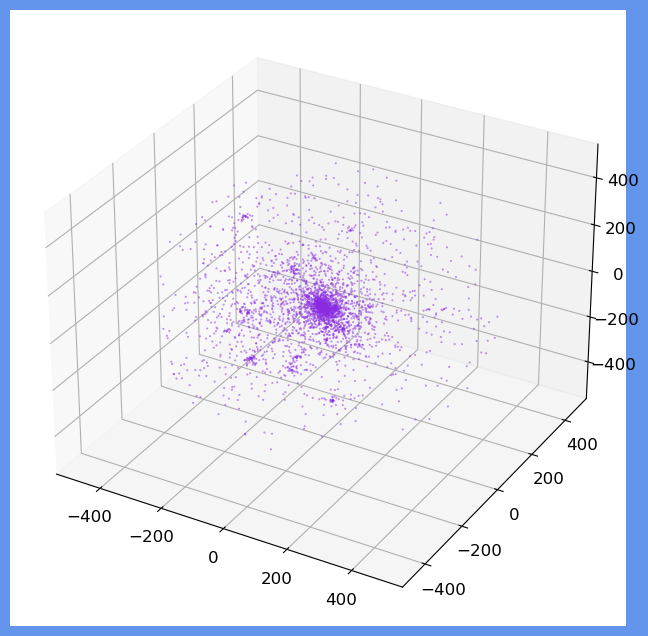

In [8]:
fig = plt.figure()
fig.patch.set_facecolor('cornflowerblue')
ax = fig.add_subplot(111, projection='3d')

print(len(DM_raw))
x_DM, y_DM, z_DM = DM_raw[:,0], DM_raw[:,1], DM_raw[:,2]
cut = 100
x, y, z = x_DM[1::cut], y_DM[1::cut], z_DM[1::cut]
ax.scatter(x, y, z, alpha=0.6, c='blueviolet', s=0.2, label='DM particles')
plt.show()